**Emotion Detection**

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf

print("TensorFlow Version: ", tf.__version__)


TensorFlow Version:  2.15.0


In [2]:
#Exploring Dataset

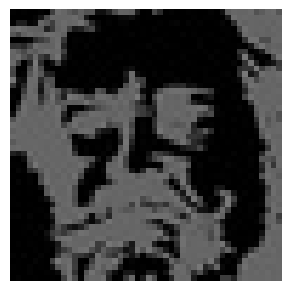

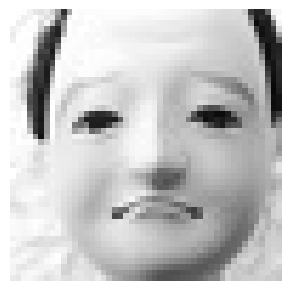

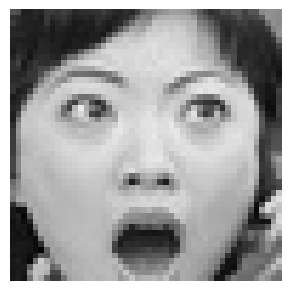

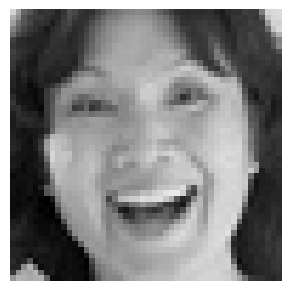

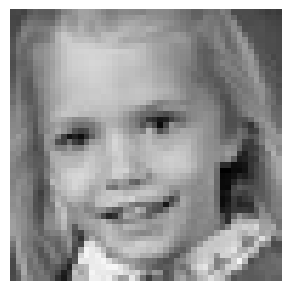

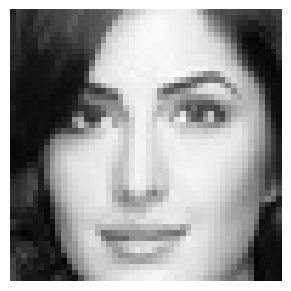

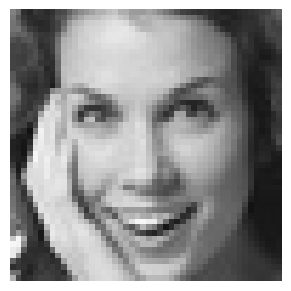

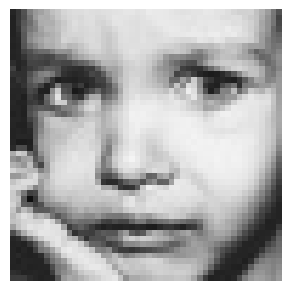

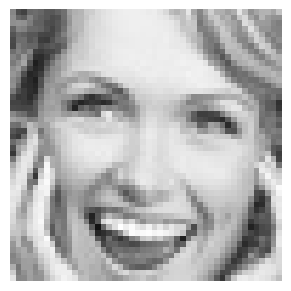

In [3]:
images = glob("train/**/**")

for i in range (9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image)); plt.axis('off')

**Preparing Data For Training**

In [4]:
img_size = 48
batch_size = 68
datagen_train =  ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/", 
                                                    target_size = (img_size,img_size), 
                                                    color_mode = "grayscale", 
                                                    batch_size = batch_size,
                                                    class_mode = "categorical", 
                                                    shuffle = True)

datagen_validation =  ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/", 
                                                    target_size = (img_size,img_size), 
                                                    color_mode = "grayscale", 
                                                    batch_size = batch_size,
                                                    class_mode = "categorical", 
                                                    shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


**Defining Model**

In [5]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)    
    
    return x

In [7]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7, activation="softmax")(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics =['accuracy'])
    
    return model

In [8]:
model = model_fer((48,48,1))
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 24, 24, 128)       0  

**Initializing the Model**

In [9]:
epochs = 5
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor = "val_accuracy", save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

**Training the Model**

In [10]:
history = model.fit(x = train_generator, 
                    steps_per_epoch = steps_per_epoch, 
                    epochs = epochs, 
                    validation_data = validation_generator, 
                    validation_steps = validation_steps, 
                    callbacks = callbacks)

Epoch 1/5


422/422 [==============================] - ETA: 0s - loss: 1.6476 - accuracy: 0.3733
Epoch 1: saving model to model_weights.h5
422/422 [==============================] - 203s 476ms/step - loss: 1.6476 - accuracy: 0.3733 - val_loss: 1.5684 - val_accuracy: 0.3895
Epoch 2/5
422/422 [==============================] - ETA: 0s - loss: 1.3566 - accuracy: 0.4862
Epoch 2: saving model to model_weights.h5
422/422 [==============================] - 200s 473ms/step - loss: 1.3566 - accuracy: 0.4862 - val_loss: 1.4637 - val_accuracy: 0.4415
Epoch 3/5
422/422 [==============================] - ETA: 0s - loss: 1.1970 - accuracy: 0.5526
Epoch 3: saving model to model_weights.h5
422/422 [==============================] - 198s 469ms/step - loss: 1.1970 - accuracy: 0.5526 - val_loss: 1.5840 - val_accuracy: 0.4020
Epoch 4/5
422/422 [==============================] - ETA: 0s - loss: 1.0640 - accuracy: 0.6062
Epoch 4: saving model to model_weights.h5
422/422 [==============================] - 19

**Model Evaluation**

In [11]:
model.evaluate(validation_generator)

106/106 [==============================] - 7s 62ms/step - loss: 1.7257 - accuracy: 0.4145


[1.725709080696106, 0.41446083784103394]

**Plotting Loss**

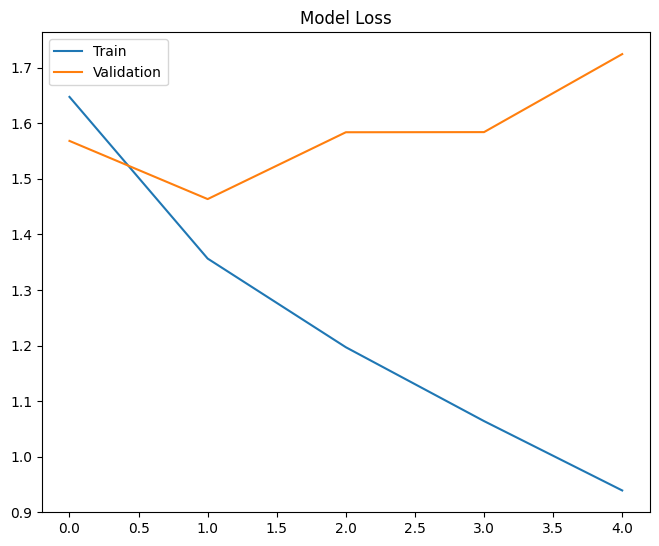

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

**Plotting Model Accuracy**

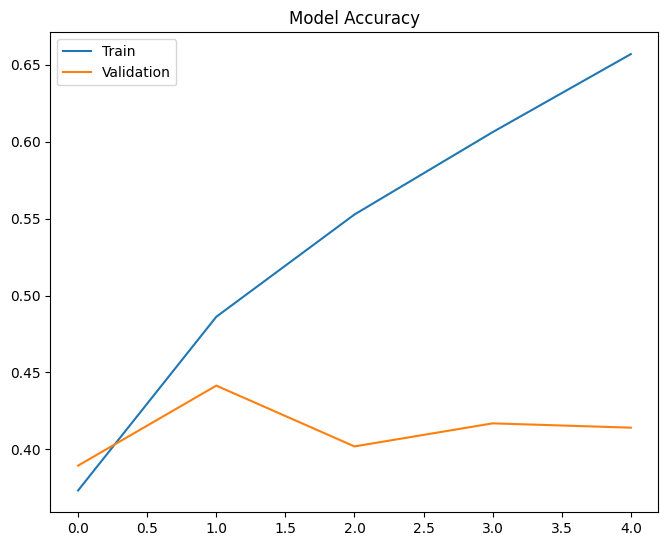

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top = 1.0, bottom = 0.0, right = 0.95, left = 0.0, hspace = 0.25, wspace = 0.35)

**Saving Model**

In [16]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)